# load data

In [1]:
#column info
# gender: giới tính
# race/ethnicity: nhóm
# parental level of education: trình độ của bố mẹ
# lunch: tiêu chuẩn của bữa ăn
# test preparation course: làm thử bài kiểm tra trước khi thi chưa

In [2]:
import pandas as pd
spf_df=pd.read_csv("StudentsPerformance.csv")
spf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [3]:
spf_df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [4]:
spf_df['Average_score']=(spf_df['math score']
                            +spf_df['reading score']
                                +spf_df['writing score'])/3

In [5]:
spf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   Average_score                1000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [6]:
def Pass_exam(df):
    a=spf_df['math score']<30
    spf_df.loc[a,'Pass_exam']=0
    a=spf_df['reading score']<30
    spf_df.loc[a,'Pass_exam']=0
    a=spf_df['writing score']<30
    spf_df.loc[a,'Pass_exam']=0
    a=spf_df['Average_score']<40
    spf_df.loc[a,'Pass_exam']=0
spf_df['Pass_exam']=1
Pass_exam(spf_df)
spf_df['Pass_exam'].value_counts()

# chỗ này để sửa toàn bộ

1    970
0     30
Name: Pass_exam, dtype: int64

# split train_df, test_df

In [7]:
from sklearn.model_selection import train_test_split
import numpy as np
msk = np.random.rand(len(spf_df)) < 0.8
train_df=spf_df[msk]
test_df=spf_df[~msk]
print(train_df)
print(test_df)

     gender race/ethnicity parental level of education         lunch  \
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
6    female        group B                some college      standard   
..      ...            ...                         ...           ...   
994    male        group A                 high school      standard   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   

    test preparation course  math score  reading score  writing score  \
1                 completed          69             90        

# Data Visualization

([<matplotlib.patches.Wedge at 0x2573cc488e0>,
 [Text(0.06819086717501044, -1.0978843316278453, 'female'),
  Text(-0.06819086717501031, 1.0978843316278453, 'male')],
 [Text(0.0371950184590966, -0.5988459990697337, '52.0%'),
  Text(-0.03719501845909653, 0.5988459990697337, '48.0%')])

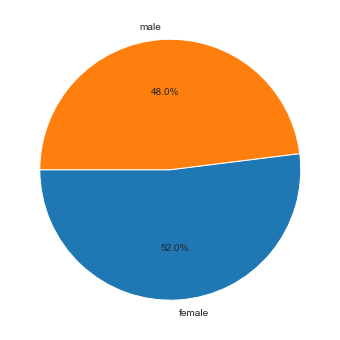

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
gender_counts=train_df['gender'].value_counts()
plt.pie(gender_counts, labels= gender_counts.index, autopct='%1.1f%%', startangle=180)

([<matplotlib.patches.Wedge at 0x2573ce923d0>,
 [Text(-0.5901527005956714, -0.9282886350589649, 'group C'),
  Text(1.0454798740988962, -0.342011451349449, 'group D'),
  Text(0.5372433205005942, 0.9598800000924574, 'group B'),
  Text(-0.5449089196305468, 0.9555491977428846, 'group E'),
  Text(-1.0533901488183344, 0.3168109757765468, 'group A')],
 [Text(-0.32190147305218436, -0.506339255486708, '32.0%'),
  Text(0.5702617495084887, -0.1865517007360631, '26.0%'),
  Text(0.29304181118214223, 0.5235709091413403, '17.8%'),
  Text(-0.29722304707120734, 0.5212086533143007, '14.9%'),
  Text(-0.5745764448100005, 0.17280598678720732, '9.3%')])

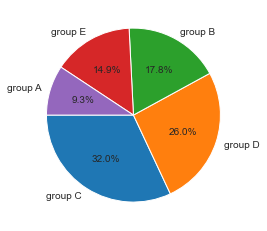

In [9]:
group_counts= train_df['race/ethnicity'].value_counts()
plt.pie(group_counts, labels= group_counts.index, autopct='%1.1f%%',startangle=180)

([<matplotlib.patches.Wedge at 0x2573ccf4250>,
 [Text(-0.8179500627861807, -0.7354982629402216, "associate's degree"),
  Text(0.601255013128099, -0.9211364769611122, 'some college'),
  Text(1.055892138170755, 0.30836957137368753, 'high school'),
  Text(0.11644050372536116, 1.093819733362031, 'some high school'),
  Text(-0.8267214230758252, 0.7256250330766454, "bachelor's degree"),
  Text(-1.0829899519590045, 0.19269863506479076, "master's degree")],
 [Text(-0.4461545797015531, -0.4011808706946663, '23.3%'),
  Text(0.32795727988805395, -0.5024380783424248, '21.8%'),
  Text(0.5759411662749571, 0.16820158438564772, '18.9%'),
  Text(0.06351300203201517, 0.5966289454701986, '18.7%'),
  Text(-0.4509389580413591, 0.39579547258726105, '11.7%'),
  Text(-0.5907217919776387, 0.10510834639897677, '5.6%')])

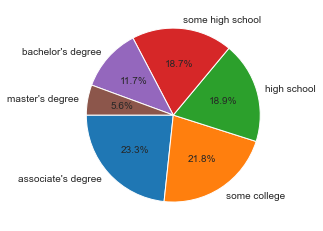

In [10]:
parentEdLevel_counts= train_df['parental level of education'].value_counts()
plt.pie(parentEdLevel_counts, labels = parentEdLevel_counts.index, autopct='%1.1f%%',startangle=180)

([<matplotlib.patches.Wedge at 0x2573cd53790>,
 [Text(0.49840863364074883, -0.980606360326284, 'standard'),
  Text(-0.4984085418297522, 0.9806064069906643, 'free/reduced')],
 [Text(0.2718592547131357, -0.5348761965416093, '65.0%'),
  Text(-0.27185920463441027, 0.5348762219949077, '35.0%')])

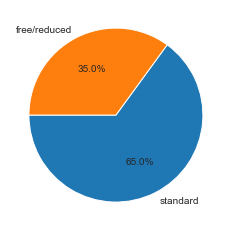

In [11]:
lunch_counts= train_df['lunch'].value_counts()
plt.pie(lunch_counts, labels = lunch_counts.index, autopct='%1.1f%%',startangle=180)

([<matplotlib.patches.Wedge at 0x2573cd96c10>,
 [Text(0.4747208187350217, -0.9922903527997996, 'none'),
  Text(-0.47472081873502076, 0.9922903527998, 'completed')],
 [Text(0.2589386284009209, -0.5412492833453452, '64.2%'),
  Text(-0.25893862840092036, 0.5412492833453454, '35.8%')])

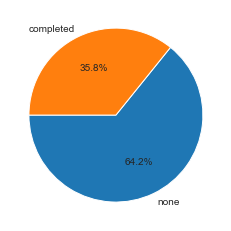

In [12]:
test_counts= train_df['test preparation course'].value_counts()
plt.pie(test_counts, labels = test_counts.index, autopct='%1.1f%%',startangle=180)

<AxesSubplot:xlabel='race/ethnicity', ylabel='Count'>

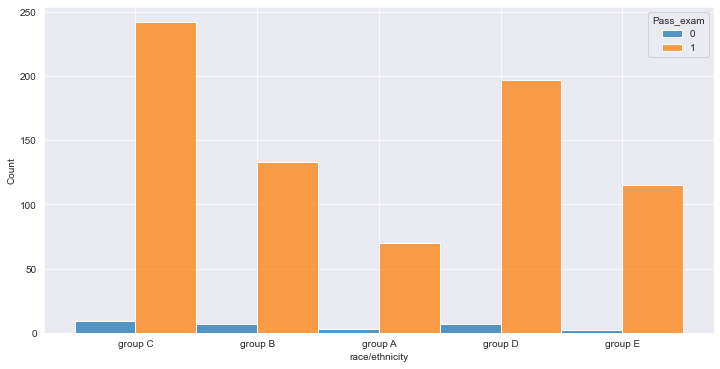

In [13]:
plt.figure(figsize=(12,6))
sns.histplot(data= train_df,x='race/ethnicity', hue='Pass_exam',multiple='dodge')

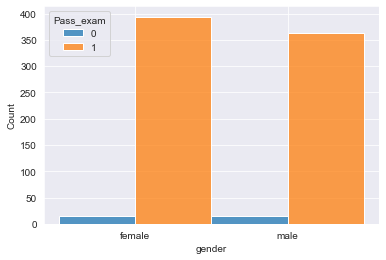

In [14]:
sns.histplot(data= train_df,x='gender', hue='Pass_exam',multiple='dodge');

<AxesSubplot:xlabel='parental level of education', ylabel='Count'>

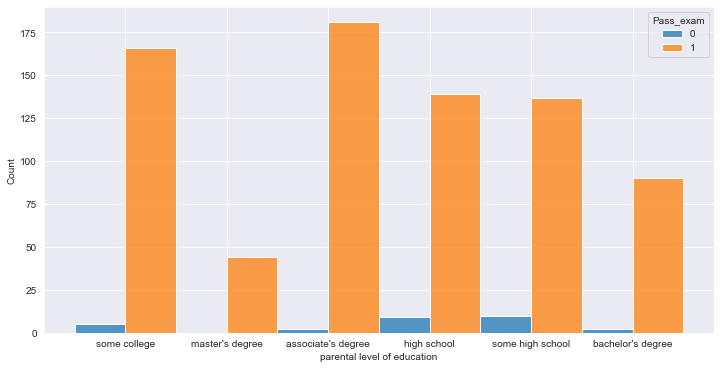

In [15]:
plt.figure(figsize=(12,6))
sns.histplot(data= train_df,x='parental level of education', hue='Pass_exam',multiple='dodge')

<AxesSubplot:xlabel='lunch', ylabel='Count'>

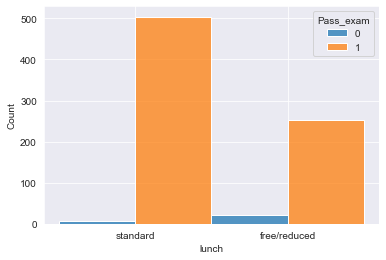

In [16]:
sns.histplot(data= train_df,x='lunch', hue='Pass_exam',multiple='dodge')

# New heading

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pass_exam', ylabel='count'>

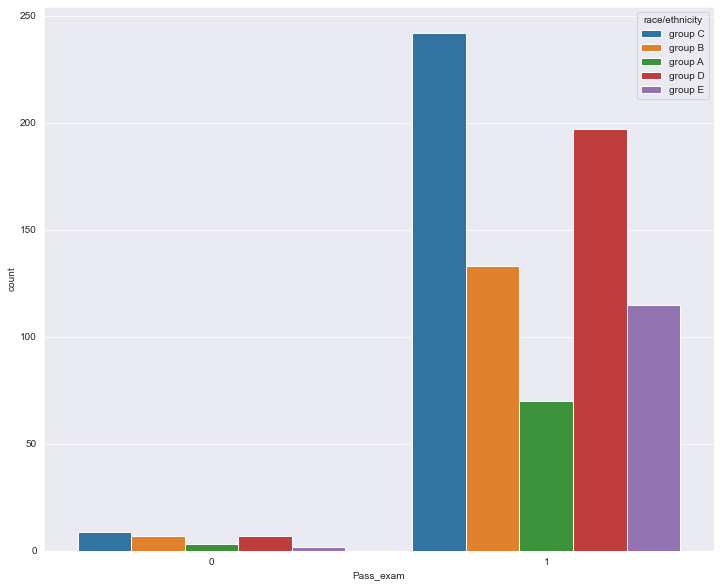

In [17]:
plt.figure(figsize=(12,10))
sns.countplot(train_df['Pass_exam'], hue = train_df['race/ethnicity'])

In [18]:
train_df['Pass_exam'].value_counts()

1    757
0     28
Name: Pass_exam, dtype: int64

In [19]:

spf_df1= pd.concat((train_df,test_df),axis=0)
train_df1=train_df.copy()
#encode gender feature
from sklearn.preprocessing import OrdinalEncoder
ohe_gender= OrdinalEncoder()
ohe_gender.fit(train_df1.gender.values.reshape(-1,1))
spf_df1['gender_enc']=ohe_gender.transform(spf_df1.gender.values.reshape(-1,1))
pd.concat((spf_df1.gender,spf_df1.gender_enc),axis=1)

,gender,gender_enc
1,female,0.0
2,female,0.0
3,male,1.0
4,male,1.0
6,female,0.0
...,...,...
983,female,0.0
988,female,0.0
992,female,0.0
993,female,0.0


In [20]:
from sklearn.preprocessing import OneHotEncoder
ohe_race= OneHotEncoder()
ohe_race.fit(train_df1['race/ethnicity'].values.reshape(-1,1))
Z=ohe_race.transform(spf_df1['race/ethnicity'].values.reshape(-1,1)).toarray()
# pd.concat((spf_df['race/ethnicity'],spf_df['race/ethnicity_enc']),axis=1)
group_cols= ['groupA','groupB','groupC','groupD','groupE']
group_df= pd.DataFrame(Z,columns = group_cols,index = spf_df1.index)
spf_df1=pd.concat((spf_df1,group_df),axis=1)
spf_df1

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average_score,Pass_exam,gender_enc,groupA,groupB,groupC,groupD,groupE
1,female,group C,some college,standard,completed,69,90,88,82.333333,1,0.0,0.0,0.0,1.0,0.0,0.0
2,female,group B,master's degree,standard,none,90,95,93,92.666667,1,0.0,0.0,1.0,0.0,0.0,0.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,1,1.0,1.0,0.0,0.0,0.0,0.0
4,male,group C,some college,standard,none,76,78,75,76.333333,1,1.0,0.0,0.0,1.0,0.0,0.0
6,female,group B,some college,standard,completed,88,95,92,91.666667,1,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,female,group A,some college,standard,completed,78,87,91,85.333333,1,0.0,1.0,0.0,0.0,0.0,0.0
988,female,group A,some high school,free/reduced,none,44,45,45,44.666667,1,0.0,1.0,0.0,0.0,0.0,0.0
992,female,group D,associate's degree,free/reduced,none,55,76,76,69.000000,1,0.0,0.0,0.0,0.0,1.0,0.0
993,female,group D,bachelor's degree,free/reduced,none,62,72,74,69.333333,1,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
ohe_lunch= OrdinalEncoder()
ohe_lunch.fit(train_df1.lunch.values.reshape(-1,1))
spf_df1['lunch_enc']= ohe_lunch.transform(spf_df1.lunch.values.reshape(-1,1))
pd.concat((spf_df1.lunch,spf_df1.lunch_enc),axis=1)
spf_df1

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average_score,Pass_exam,gender_enc,groupA,groupB,groupC,groupD,groupE,lunch_enc
1,female,group C,some college,standard,completed,69,90,88,82.333333,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,female,group B,master's degree,standard,none,90,95,93,92.666667,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,male,group C,some college,standard,none,76,78,75,76.333333,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0
6,female,group B,some college,standard,completed,88,95,92,91.666667,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,female,group A,some college,standard,completed,78,87,91,85.333333,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0
988,female,group A,some high school,free/reduced,none,44,45,45,44.666667,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
992,female,group D,associate's degree,free/reduced,none,55,76,76,69.000000,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
993,female,group D,bachelor's degree,free/reduced,none,62,72,74,69.333333,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [22]:
ohe_parentEdlevel=OneHotEncoder()
ohe_parentEdlevel.fit(spf_df1['parental level of education'].values.reshape(-1,1))
A= ohe_parentEdlevel.transform(spf_df1['parental level of education'].values.reshape(-1,1)).toarray()
parentEdlevel_cols=[" associate's degree","bachelor's degree"," high school","master's degree","some college","some high school"]
Edlevel_df=pd.DataFrame(A,columns= parentEdlevel_cols, index= spf_df1.index)
spf_df1= pd.concat((spf_df1,Edlevel_df),axis=1)
# spf_df1['parental level of education'].value_counts()
spf_df1

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average_score,Pass_exam,...,groupC,groupD,groupE,lunch_enc,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
1,female,group C,some college,standard,completed,69,90,88,82.333333,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,female,group B,master's degree,standard,none,90,95,93,92.666667,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,male,group C,some college,standard,none,76,78,75,76.333333,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,female,group B,some college,standard,completed,88,95,92,91.666667,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,female,group A,some college,standard,completed,78,87,91,85.333333,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
988,female,group A,some high school,free/reduced,none,44,45,45,44.666667,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
992,female,group D,associate's degree,free/reduced,none,55,76,76,69.000000,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
993,female,group D,bachelor's degree,free/reduced,none,62,72,74,69.333333,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [23]:
ohe_test= OrdinalEncoder()
ohe_test.fit(spf_df1['test preparation course'].values.reshape(-1,1))
spf_df1['test_enc']=ohe_test.transform(spf_df1['test preparation course'].values.reshape(-1,1))
pd.concat((spf_df1['test preparation course'],spf_df1['test_enc']),axis=1)

,test preparation course,test_enc
1,completed,0.0
2,none,1.0
3,none,1.0
4,none,1.0
6,completed,0.0
...,...,...
983,completed,0.0
988,none,1.0
992,none,1.0
993,none,1.0


In [24]:
spf_df1

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average_score,Pass_exam,...,groupD,groupE,lunch_enc,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,test_enc
1,female,group C,some college,standard,completed,69,90,88,82.333333,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,female,group B,master's degree,standard,none,90,95,93,92.666667,1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,male,group C,some college,standard,none,76,78,75,76.333333,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
6,female,group B,some college,standard,completed,88,95,92,91.666667,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,female,group A,some college,standard,completed,78,87,91,85.333333,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
988,female,group A,some high school,free/reduced,none,44,45,45,44.666667,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
992,female,group D,associate's degree,free/reduced,none,55,76,76,69.000000,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
993,female,group D,bachelor's degree,free/reduced,none,62,72,74,69.333333,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [25]:
# train test split
spf_df1.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Average_score', 'Pass_exam', 'gender_enc', 'groupA',
       'groupB', 'groupC', 'groupD', 'groupE', 'lunch_enc',
       ' associate's degree', 'bachelor's degree', ' high school',
       'master's degree', 'some college', 'some high school', 'test_enc'],
      dtype='object')

In [26]:
cols_drop=list(spf_df1.columns[0:9])
cols_drop

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score',
 'Average_score']

In [27]:
last_of_train= len(train_df)
train_enc= spf_df1.drop(columns= cols_drop, axis=1).iloc[:last_of_train]
y_train_enc= train_enc.Pass_exam
test_enc= spf_df1.drop(columns= cols_drop,axis=1).iloc[last_of_train:]
y_test_enc= test_enc.Pass_exam
train_enc=train_enc.drop(columns=['Pass_exam'],axis=1).iloc[:last_of_train]
test_enc=test_enc.drop(columns=['Pass_exam'],axis=1).iloc[:last_of_train]

In [28]:
y_train=y_train_enc.to_numpy()
X_train= train_enc.to_numpy()
X_test=test_enc.to_numpy()
y_test=y_test_enc.to_numpy()

# balance data

In [29]:
#smote data

In [30]:
from collections import Counter
print(Counter(y_train))
print(27/789)

Counter({1: 757, 0: 28})
0.034220532319391636


In [31]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
#define pipeline
over=SMOTE(sampling_strategy=0.4) # tang minor chiem 40 %
under=RandomUnderSampler(sampling_strategy=0.5) # major/ minor =2
steps= [("o",over),('u',under)]
pipeline= Pipeline(steps=steps)
#transform dataset
X_train,y_train= pipeline.fit_resample(X_train,y_train)
#summarize the new class distribution
print(Counter(y_train))

Counter({1: 604, 0: 302})


In [32]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from numpy import mean
#define model
model= DecisionTreeClassifier(random_state=1)
#evaluate pipeline
cv= RepeatedStratifiedKFold(n_splits=10, n_repeats=3,random_state=1)
scores = cross_val_score(model,X_train,y_train,scoring= 'roc_auc', cv=cv , n_jobs=-1)
print('Mean ROC AUC : %.3f' %mean(scores))

Mean ROC AUC : 0.946


In [33]:
model.fit(X_train,y_train)
y_test_pred=model.predict(X_test)

In [34]:
from sklearn.metrics import roc_auc_score, roc_curve, log_loss, classification_report, confusion_matrix
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.99      0.94      0.97       213

    accuracy                           0.93       215
   macro avg       0.50      0.47      0.48       215
weighted avg       0.98      0.93      0.96       215



In [35]:
# randomforest
from sklearn.ensemble import RandomForestClassifier
model_random= RandomForestClassifier()
# cv_random= RepeatedStratifiedKFold(n_splits=10, n_repeats=3,random_state=1)
scores_random = cross_val_score(model_random,X_train,y_train,scoring= 'roc_auc', cv=cv , n_jobs=-1)
print('Mean ROC AUC : %.3f' %mean(scores_random))

Mean ROC AUC : 0.970


In [36]:
model_random.fit(X_train,y_train)
y_test_pred= model_random.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.99      0.97      0.98       213

    accuracy                           0.96       215
   macro avg       0.50      0.48      0.49       215
weighted avg       0.98      0.96      0.97       215



In [37]:
# Logistic 
from sklearn.linear_model import LogisticRegression
Logis_model= LogisticRegression(solver= 'liblinear',random_state=1)
scores_Logis= cross_val_score(Logis_model,X_train,y_train,scoring='roc_auc',cv=cv, n_jobs=-1)
# print('Mean ROC AUC :%.3f' % mean(scores_Logis))

In [38]:
Logis_model.fit(X_train,y_train)
y_test_pred= Logis_model.predict(X_test)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.03      0.50      0.06         2
           1       0.99      0.85      0.92       213

    accuracy                           0.85       215
   macro avg       0.51      0.67      0.49       215
weighted avg       0.99      0.85      0.91       215



In [39]:
#MLP
# from sklearn.neural_network import MLPClassifier
# MLP_model= MLPClassifier(solver='sgd', batch_size=10, learning_rate_init=0.1,)
# scores_MLP = cross_val_score(MLP_model,X_train,y_train,scoring= 'roc_auc', cv=cv , n_jobs=-1)
# print('Mean ROC AUC : %.3f' %mean(scores_MLP))
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
params={
    'batch_size':[10,20,30],
    'learning_rate_init':[0.02, 0.05,0.1]
}
mlp= MLPClassifier(solver='sgd')
gridSearch = GridSearchCV(mlp,params,scoring='roc_auc')
gridSearch.fit(X_train,y_train)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(estimator=MLPClassifier(solver='sgd'),
             param_grid={'batch_size': [10, 20, 30],
                         'learning_rate_init': [0.02, 0.05, 0.1]},
             scoring='roc_auc')

In [40]:
gridSearch.best_estimator_

MLPClassifier(batch_size=20, learning_rate_init=0.02, solver='sgd')

In [41]:
MLP_model= MLPClassifier(solver='sgd', batch_size=10, learning_rate_init=0.02)
scores_MLP = cross_val_score(MLP_model,X_train,y_train,scoring= 'roc_auc' ,cv=cv, n_jobs=-1)
print('Mean ROC AUC : %.3f' %mean(scores_MLP))

Mean ROC AUC : 0.970


In [42]:
MLP_model.fit(X_train,y_train)
y_test_pred=MLP_model.predict(X_test)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.08      0.50      0.14         2
           1       1.00      0.95      0.97       213

    accuracy                           0.94       215
   macro avg       0.54      0.72      0.56       215
weighted avg       0.99      0.94      0.96       215



In [45]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred)

0.9711538461538461

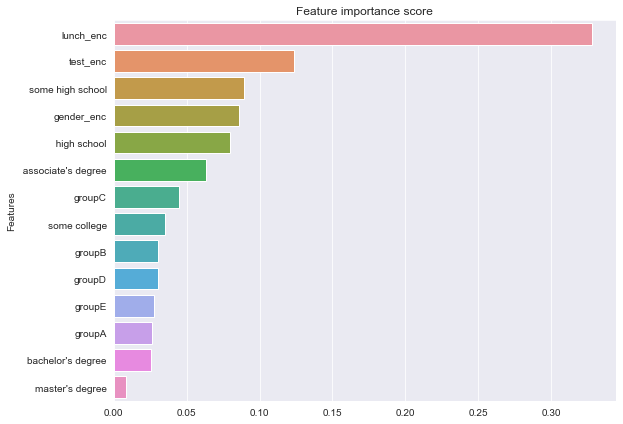

In [43]:
# feature importance

feature_scores = pd.Series(model_random.feature_importances_, index=train_enc.columns).sort_values(ascending=False)
f, ax = plt.subplots(figsize=(9, 7))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=spf_df)
ax.set_title("Feature importance score")
ax.set_yticklabels(feature_scores.index)
ax.set_ylabel("Features")
plt.show()

# summarize


In [44]:
# chọn Logistic regression
# cần thu thập thêm dữ liệu